Purpose of this nb is to load some EEG data and transform it into spectrogram OR transform using CWT so that it can be input into a CNN.
Then trial inputting it to a CNN and overfitting as a starting point. Then go from there.

In [3]:
import pandas as pd
import mne as mne
import os 
import time
import numpy as np
import matplotlib.pyplot as plt
import joblib
import constants
from IPython.utils import io
import time
import sys
import yasa
from scipy.signal import welch

#Import my modules
import format_eeg_data
import constants
import eeg_stat_ts

In [4]:
t1 = time.time()


data_types = ['N2', 'N3','REM', 'N1', 'Wake']
data_type = 'Wake'

for data_type in ['Wake']:
    channels = constants.channel_list
    
    # 1. generate all path names and class list(s) etc. 
    folder = '/user/home/ko20929/work/RBD_using_custom_package/Blue_pebble/'
    paths = joblib.load(folder + data_type + '_paths.pkl') # keys : ['selected_paths', 's_class_list', 's_night_list', 's_sleep_type', 's_p_id']
    
    # 2. Load corresponding data into dataframes, store in dataframe list
    df_list = []
    
    with io.capture_output() as captured:
        for path in paths['selected_paths'][:5]:
            data_epo = mne.read_epochs(path)
            data = data_epo._data * 1e6  # convert signal from V to uV
            df_full = data_epo.to_data_frame()
            df = df_full[channels].copy()
            df_list.append(df)


t2 = time.time()

t2-t1

0.4912278652191162

In [6]:
# This data has been downsampled to 256Hz

In [7]:
df_list[0]

,Fp1,Fpz,Fp2,F1,Fz,F2,AF7,F7,F5,F3,...,P7,PO7,P4,P6,P8,PO8,POz,O1,O2,Oz
0,-1.904406,-3.945628,-7.005362,-9.202778,-8.202033,-10.569560,-1.898904,1.568763,-5.506993,-10.228647,...,6.436173,14.860780,18.564304,16.980654,11.301187,11.467259,15.952952,14.422393,8.808363,14.301993
1,-3.024036,-7.276406,-11.435141,-8.654221,-9.988004,-12.863188,-3.055640,4.375521,-4.274590,-7.848141,...,5.048251,13.506417,16.328997,14.109278,8.265340,5.056668,14.357885,11.126562,1.250569,9.254846
2,-10.879476,-13.112477,-16.145321,-10.924383,-12.815134,-15.467172,-5.211012,-0.385535,-9.521941,-11.483792,...,13.366037,16.702503,19.210698,19.176703,13.762823,15.023921,21.183812,15.379119,12.795604,17.238566
3,-9.667392,-5.724421,-6.696079,-9.240975,-11.099974,-10.859570,-9.524269,-1.200148,-9.612916,-10.547187,...,10.923939,16.634203,16.262837,15.973126,9.382903,11.623734,19.621477,11.829336,8.127158,16.225089
4,-3.379244,-4.348656,-10.627554,-8.519230,-10.993394,-10.007520,-3.901865,5.033413,-5.748108,-8.566460,...,8.351523,12.018661,16.704558,18.324730,15.996813,18.702051,16.663427,6.398684,14.061866,14.195456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46075,-6.693451,-7.470023,-9.660442,-5.101953,-4.939633,-4.313067,-12.352386,-11.549962,-13.267957,-9.157659,...,-3.643359,4.683001,10.522343,10.206623,3.760044,4.769036,14.314734,3.761109,2.608335,5.720305
46076,5.708681,-6.410348,-16.312757,-3.050638,-3.289991,-3.865786,-4.989585,-10.770555,-9.486419,-5.226548,...,-1.162818,7.846573,13.651619,15.377267,11.149772,13.058772,13.495828,6.010366,15.313632,9.311389
46077,-18.683211,-9.285893,-9.726351,-4.730514,-4.397817,-4.605422,-11.902808,-8.551278,-10.362826,-8.436381,...,0.377848,11.808380,14.195878,15.906078,14.425714,16.446602,13.546781,13.390708,16.972523,14.617699
46078,-12.031123,-10.072052,-9.609721,-3.030568,-3.760340,-5.689743,-4.971448,5.253947,2.921221,-0.341600,...,3.442467,11.057867,12.669621,15.664935,17.954941,17.979828,9.133757,10.830310,10.439493,8.605553


In [5]:
46080 / (60*256)

3.0

In [5]:
from scipy.signal import spectrogram

In [6]:
frequencies, times, Sxx = spectrogram(df_list[0].Fp1.values, 256)

In [8]:
Sxx

array([[1.34300076e-03, 6.04129068e-02, 2.49645177e-01, ...,
        1.66372448e-02, 1.76118059e-01, 1.14133339e-02],
       [5.82236480e+01, 6.52170314e+00, 1.01826361e+01, ...,
        1.34582437e+00, 3.67690086e+00, 2.72546854e-01],
       [7.75066661e-01, 7.25727924e+00, 1.21666008e-01, ...,
        1.03874120e+01, 3.19047298e+00, 6.12235985e+00],
       ...,
       [5.56461387e-02, 2.26845018e-01, 6.19340906e-02, ...,
        2.95864607e-03, 9.60303432e-02, 3.38934068e-01],
       [1.11549006e-02, 6.02896709e-02, 4.02660511e-02, ...,
        1.04234038e-02, 3.18180933e-01, 1.36460697e-01],
       [4.50308229e-03, 2.27132154e-02, 1.79011148e-02, ...,
        3.87644965e-03, 3.11262251e-02, 3.57800886e-02]])

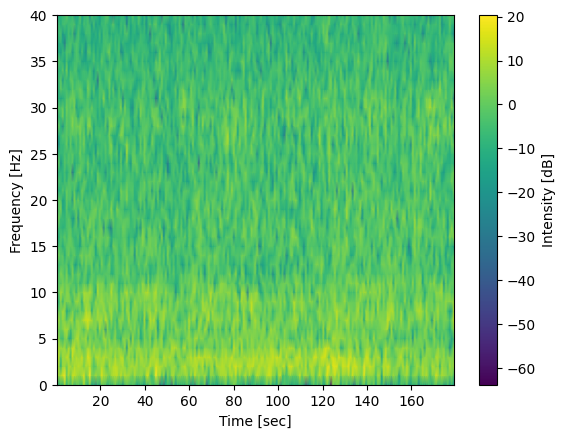

In [7]:
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.colorbar(label='Intensity [dB]')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(0, 40)

plt.show()

In [1]:
from scipy.signal.windows import gaussian

(50.0, 125.0)

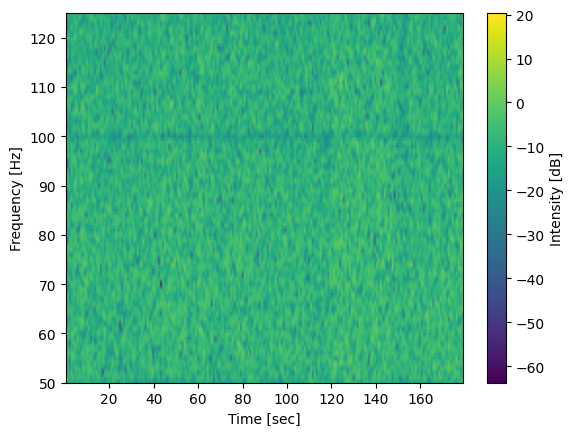

In [25]:
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.colorbar(label='Intensity [dB]')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(50, 125)

#### Try 2 at generating spectrograms 

In [1]:
from scipy.signal import ShortTimeFFT
from scipy.signal.windows import gaussian

In [29]:
g_std = 8  # standard deviation for Gaussian window in samples
w = gaussian(50, std=g_std, sym=True)  # symmetric Gaussian window
SFT = ShortTimeFFT(w, hop=10, fs=256, mfft=200, scale_to='magnitude')
Sx = SFT.stft(df_list[0]['Fp1'].values)  # perform the STFT

In [21]:
t_lo, t_hi = SFT.extent(len(df_list[0]['Fp1'].values))[:2]  # time range of plot

In [25]:
N = len(df_list[0]['Fp1'].values)

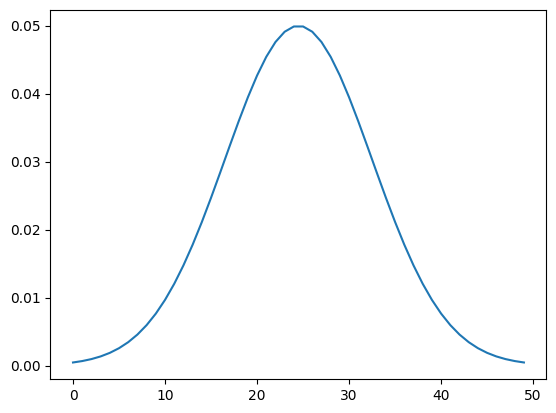

In [28]:
plt.plot(SFT.win)